In [350]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [351]:
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')

In [352]:
train_data.shape

(2952, 70)

In [353]:
test_data.shape

(1969, 69)

In [354]:
train_data.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,alcohol_consume_units,symptoms,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15,symptom16,symptom17,symptom18,symptom19,symptom20,symptom21,symptom22,symptom23,symptom24,symptom25,symptom26,symptom27,symptom28,symptom29,symptom30,symptom31,symptom32,symptom33,symptom34,symptom35,symptom36,symptom37,symptom38,symptom39,symptom40,symptom50,symptom51,symptom52,symptom53,symptom54,symptom55,symptom56,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
0,TCBA-B8-0x204,7,Male,60-64,NaN,2010,81403,2016.0,34,2,2,Dry eye,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,TCBA-B8-0x1063,1,Male,85-89,White,2012,80463,2016.0,4,7,5,Calm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,TCBA-B8-0xb7d,1,Female,70-74,White,2013,80103,2018.0,20,1,4,Allergies,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,TCBA-B8-0xfa7,104,Female,65-69,White,2013,80463,2018.0,20,5,3,Gabapentin,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,TCBA-B8-0xdc,21,Male,50-54,White,2010,80463,2016.0,20,5,2,Obsessive-compulsive disorder,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [355]:
test_data.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,alcohol_consume_units,symptoms,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15,symptom16,symptom17,symptom18,symptom19,symptom20,symptom21,symptom22,symptom23,symptom24,symptom25,symptom26,symptom27,symptom28,symptom29,symptom30,symptom31,symptom32,symptom33,symptom34,symptom35,symptom36,symptom37,symptom38,symptom39,symptom40,symptom50,symptom51,symptom52,symptom53,symptom54,symptom55,symptom56,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66
0,TCBA-B8-0x7e9,1,Male,85-89,White,2009,80003,2014.0,25,4,4,Humira,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TCBA-B8-0x6bc,1,Male,80-84,White,2013,82503,2020.0,12,8,3,Sleeplessness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TCBA-B8-0x1195,1,Male,60-64,White,2013,80703,2017.0,3,5,6,Back pain,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TCBA-B8-0x8a5,1,Male,85-89,White,2013,80103,2018.0,20,5,0,Depression,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TCBA-B8-0xa21,1,Male,85-89,White,2009,80003,NaN,25,2,8,Neck pain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [356]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             2952 non-null   object 
 1   tumor_cell_count       2952 non-null   int64  
 2   gender                 2952 non-null   object 
 3   age_group              2927 non-null   object 
 4   race                   2649 non-null   object 
 5   year_of_diagnosis      2952 non-null   int64  
 6   morphology_code        2952 non-null   int64  
 7   year_of_death          2550 non-null   float64
 8   smoke_units            2952 non-null   int64  
 9   area_code              2952 non-null   int64  
 10  alcohol_consume_units  2952 non-null   int64  
 11  symptoms               2952 non-null   object 
 12  symptom1               2952 non-null   float64
 13  symptom2               2952 non-null   float64
 14  symptom3               2952 non-null   float64
 15  symp

In [357]:
train_data.drop(['patient_id','area_code',"year_of_diagnosis","year_of_death"],inplace=True,axis=1)
test_data.drop(['area_code',"year_of_diagnosis","year_of_death"],inplace=True,axis=1)

In [358]:
train_data.columns

Index(['tumor_cell_count', 'gender', 'age_group', 'race', 'morphology_code',
       'smoke_units', 'alcohol_consume_units', 'symptoms', 'symptom1',
       'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'symptom7',
       'symptom8', 'symptom9', 'symptom10', 'symptom11', 'symptom12',
       'symptom13', 'symptom14', 'symptom15', 'symptom16', 'symptom17',
       'symptom18', 'symptom19', 'symptom20', 'symptom21', 'symptom22',
       'symptom23', 'symptom24', 'symptom25', 'symptom26', 'symptom27',
       'symptom28', 'symptom29', 'symptom30', 'symptom31', 'symptom32',
       'symptom33', 'symptom34', 'symptom35', 'symptom36', 'symptom37',
       'symptom38', 'symptom39', 'symptom40', 'symptom50', 'symptom51',
       'symptom52', 'symptom53', 'symptom54', 'symptom55', 'symptom56',
       'symptom57', 'symptom58', 'symptom59', 'symptom60', 'symptom61',
       'symptom62', 'symptom63', 'symptom64', 'symptom65', 'symptom66',
       'death_due_to_cancer'],
      dtype='object')

In [359]:
train_data.describe()

,tumor_cell_count,morphology_code,smoke_units,alcohol_consume_units,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15,symptom16,symptom17,symptom18,symptom19,symptom20,symptom21,symptom22,symptom23,symptom24,symptom25,symptom26,symptom27,symptom28,symptom29,symptom30,symptom31,symptom32,symptom33,symptom34,symptom35,symptom36,symptom37,symptom38,symptom39,symptom40,symptom50,symptom51,symptom52,symptom53,symptom54,symptom55,symptom56,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
count,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.00000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000
mean,8.036924,80940.815718,14.992209,3.258469,0.139566,0.021341,0.021680,0.131436,0.047425,0.047764,0.392276,0.023035,0.047764,0.049797,0.019986,0.11687,0.137534,0.050136,0.188347,0.232724,0.020664,0.044038,0.113144,0.021341,0.025068,0.027100,0.143631,0.074187,0.024051,0.024051,0.138889,0.050136,0.023035,0.021680,0.020664,0.021341,0.022696,0.023374,0.101626,0.022358,0.020325,0.049119,0.043022,0.024051,0.021341,0.024051,0.021003,0.099593,0.022358,0.021341,0.021003,0.026423,0.026762,0.026423,0.026084,0.023713,0.019986,0.020325,0.019648,0.019986,0.024729,0.699526
std,24.840630,1357.411378,7.926741,2.372024,0.346595,0.144544,0.145662,0.337934,0.212583,0.213303,0.488340,0.150041,0.213303,0.217562,0.139977,0.32132,0.344468,0.218261,0.391055,0.422639,0.142281,0.205214,0.316822,0.144544,0.156357,0.162403,0.350775,0.262119,0.153235,0.153235,0.345889,0.218261,0.150041,0.145662,0.142281,0.144544,0.148959,0.151114,0.302207,0.147869,0.141134,0.216154,0.202940,0.153235,0.144544,0.153235,0.143417,0.299508,0.147869,0.144544,0.143417,0.160416,0.161413,0.160416,0.159412,0.152178,0.139977,0.141134,0.138810,0.139977,0.155324,0.458542
min,1.000000,80003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,80103.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,80463.000000,15.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [360]:
test_data.describe()

,tumor_cell_count,morphology_code,smoke_units,alcohol_consume_units,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15,symptom16,symptom17,symptom18,symptom19,symptom20,symptom21,symptom22,symptom23,symptom24,symptom25,symptom26,symptom27,symptom28,symptom29,symptom30,symptom31,symptom32,symptom33,symptom34,symptom35,symptom36,symptom37,symptom38,symptom39,symptom40,symptom50,symptom51,symptom52,symptom53,symptom54,symptom55,symptom56,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66
count,1969.000000,1969.000000,1969.000000,1969.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.00000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
mean,7.644997,80883.195023,14.791772,3.295074,0.135163,0.022866,0.022358,0.150407,0.041667,0.03811,0.393293,0.023374,0.044207,0.041159,0.024898,0.111280,0.138211,0.037602,0.180894,0.233232,0.029980,0.049797,0.116870,0.025915,0.020325,0.017276,0.141260,0.068598,0.024898,0.024898,0.145325,0.043699,0.023374,0.025407,0.026931,0.025915,0.023882,0.025915,0.082317,0.024390,0.027439,0.045224,0.051321,0.024898,0.019817,0.021850,0.026423,0.091463,0.024390,0.025915,0.023374,0.021341,0.017785,0.021341,0.021850,0.025407,0.024898,0.024390,0.028455,0.027947,0.020833
std,23.119727,1294.474641,7.931638,2.399988,0.341984,0.149514,0.147882,0.357560,0.199877,0.19151,0.488605,0.151127,0.205608,0.198707,0.155855,0.314559,0.345209,0.190279,0.385028,0.422996,0.170575,0.217580,0.321347,0.158921,0.141146,0.130333,0.348378,0.252833,0.155855,0.155855,0.352518,0.204477,0.151127,0.157396,0.161923,0.158921,0.152721,0.158921,0.274917,0.154297,0.163400,0.207847,0.220708,0.155855,0.139407,0.146229,0.160430,0.288340,0.154297,0.158921,0.151127,0.144557,0.132201,0.144557,0.146229,0.157396,0.155855,0.154297,0.166312,0.164863,0.142862
min,1.000000,80003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,80103.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,80463.000000,15.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [361]:
print("TRAINING DATA MISSING VALUE ANALYSIS")
Total = train_data.isnull().sum().sort_values(ascending=False)          
Percent = (train_data.isnull().sum()*100/train_data.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

TRAINING DATA MISSING VALUE ANALYSIS


,Total,Percentage of Missing Values
race,303,10.264228
age_group,25,0.846883
death_due_to_cancer,0,0.000000
symptom17,0,0.000000
symptom12,0,0.000000
...,...,...
symptom31,0,0.000000
symptom30,0,0.000000
symptom29,0,0.000000
symptom28,0,0.000000


**The training data has missing values in race and age_group columns**

In [362]:
print("TEST DATA MISSING VALUE ANALYSIS")
Total = test_data.isnull().sum().sort_values(ascending=False)          
Percent = (test_data.isnull().sum()*100/test_data.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

TEST DATA MISSING VALUE ANALYSIS


,Total,Percentage of Missing Values
race,199,10.106653
age_group,15,0.761808
symptom66,1,0.050787
symptom13,1,0.050787
symptom25,1,0.050787
...,...,...
smoke_units,0,0.000000
morphology_code,0,0.000000
gender,0,0.000000
tumor_cell_count,0,0.000000


**The test data has missing values in race and age_group columns**

**HANDLING MISSING VALUES**

In [363]:
train_data["race"].value_counts()

White       2256
Asian        154
Black        117
OtherEth      69
Mixed         33
Chinese       20
Name: race, dtype: int64

In [364]:
train_data["race"].mode()

0    White
dtype: object

In [365]:
train_data["race"].replace(np.NaN,"White" ,inplace = True)

In [366]:
test_data["race"].value_counts()

White       1519
Asian         86
Black         66
OtherEth      65
Chinese       17
Mixed         17
Name: race, dtype: int64

In [367]:
test_data["race"].mode()

0    White
dtype: object

In [368]:
test_data["race"].replace(np.NaN,"White" ,inplace = True)

In [369]:
train_data["age_group"].value_counts()

75-79    451
80-84    444
70-74    437
65-69    376
60-64    298
85-89    264
55-59    204
50-54    153
90+      145
45-49     74
40-44     57
00-39     24
Name: age_group, dtype: int64

In [370]:
age=[]
for i in train_data["age_group"]:
  if i=="75-79":
    age.append((75+79)/2)
  elif i=="80-84":
    age.append((80+84)/2)
  elif i=="70-74":
    age.append((70+74)/2)
  elif i=="65-69":
    age.append((65+69)/2)
  elif i=="85-89":
    age.append((85+89)/2)
  elif i=="55-59":
    age.append((55+59)/2)
  elif i=="50-54":
    age.append((50+54)/2)
  elif i=="45-49":
    age.append((45+49)/2)
  elif i=="40-44":
    age.append((40+44)/2)
  elif i=="00-39":
    age.append((00+39)/2)
  else:
    age.append(95)

In [371]:
train_data["age_group"]=age

In [372]:
age1=[]
for i in test_data["age_group"]:
  if i=="75-79":
    age1.append((75+79)/2)
  elif i=="80-84":
    age1.append((80+84)/2)
  elif i=="70-74":
    age1.append((70+74)/2)
  elif i=="65-69":
    age1.append((65+69)/2)
  elif i=="85-89":
    age1.append((85+89)/2)
  elif i=="55-59":
    age1.append((55+59)/2)
  elif i=="50-54":
    age1.append((50+54)/2)
  elif i=="45-49":
    age1.append((45+49)/2)
  elif i=="40-44":
    age1.append((40+44)/2)
  elif i=="00-39":
    age1.append((00+39)/2)
  else:
    age1.append(95)

In [373]:
test_data["age_group"]=age1

In [374]:
train_data["age_group"].replace(np.NaN,train_data["age_group"].median() ,inplace = True)

In [375]:
test_data["age_group"].replace(np.NaN,train_data["age_group"].median() ,inplace = True)

In [376]:
train_data.isnull().sum()

tumor_cell_count       0
gender                 0
age_group              0
race                   0
morphology_code        0
                      ..
symptom63              0
symptom64              0
symptom65              0
symptom66              0
death_due_to_cancer    0
Length: 66, dtype: int64

In [377]:
test_data.fillna(method="ffill",inplace=True)

In [378]:
test_data.isnull().sum()

patient_id          0
tumor_cell_count    0
gender              0
age_group           0
race                0
                   ..
symptom62           0
symptom63           0
symptom64           0
symptom65           0
symptom66           0
Length: 66, dtype: int64

In [379]:
train_data.columns

Index(['tumor_cell_count', 'gender', 'age_group', 'race', 'morphology_code',
       'smoke_units', 'alcohol_consume_units', 'symptoms', 'symptom1',
       'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'symptom7',
       'symptom8', 'symptom9', 'symptom10', 'symptom11', 'symptom12',
       'symptom13', 'symptom14', 'symptom15', 'symptom16', 'symptom17',
       'symptom18', 'symptom19', 'symptom20', 'symptom21', 'symptom22',
       'symptom23', 'symptom24', 'symptom25', 'symptom26', 'symptom27',
       'symptom28', 'symptom29', 'symptom30', 'symptom31', 'symptom32',
       'symptom33', 'symptom34', 'symptom35', 'symptom36', 'symptom37',
       'symptom38', 'symptom39', 'symptom40', 'symptom50', 'symptom51',
       'symptom52', 'symptom53', 'symptom54', 'symptom55', 'symptom56',
       'symptom57', 'symptom58', 'symptom59', 'symptom60', 'symptom61',
       'symptom62', 'symptom63', 'symptom64', 'symptom65', 'symptom66',
       'death_due_to_cancer'],
      dtype='object')

In [380]:
train_data.drop("symptoms",axis=1,inplace=True)
test_data.drop("symptoms",axis=1,inplace=True)

**ENCODING CATEGORICAL COLUMNS**

In [381]:
train_data["gender"].value_counts()

Male      1668
Female    1284
Name: gender, dtype: int64

In [382]:
train_data["gender"].replace({"Male":1,"Female":0},inplace=True)
test_data["gender"].replace({"Male":1,"Female":0},inplace=True)

In [383]:
train_data["race"].value_counts()

White       2559
Asian        154
Black        117
OtherEth      69
Mixed         33
Chinese       20
Name: race, dtype: int64

In [384]:
pd.get_dummies(train_data, columns= ['race'], drop_first = True).head()

,tumor_cell_count,gender,age_group,morphology_code,smoke_units,alcohol_consume_units,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15,symptom16,symptom17,symptom18,symptom19,symptom20,symptom21,symptom22,symptom23,symptom24,symptom25,symptom26,symptom27,symptom28,symptom29,symptom30,symptom31,symptom32,symptom33,symptom34,symptom35,symptom36,symptom37,symptom38,symptom39,symptom40,symptom50,symptom51,symptom52,symptom53,symptom54,symptom55,symptom56,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer,race_Black,race_Chinese,race_Mixed,race_OtherEth,race_White
0,7,1,95.0,81403,34,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,1,1,87.0,80463,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
2,1,0,72.0,80103,20,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
3,104,0,67.0,80463,20,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
4,21,1,52.0,80463,20,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1


In [385]:
train_data.drop("race",axis=1,inplace=True)

In [386]:
pd.get_dummies(test_data, columns= ['race'], drop_first = True).head()

,patient_id,tumor_cell_count,gender,age_group,morphology_code,smoke_units,alcohol_consume_units,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15,symptom16,symptom17,symptom18,symptom19,symptom20,symptom21,symptom22,symptom23,symptom24,symptom25,symptom26,symptom27,symptom28,symptom29,symptom30,symptom31,symptom32,symptom33,symptom34,symptom35,symptom36,symptom37,symptom38,symptom39,symptom40,symptom50,symptom51,symptom52,symptom53,symptom54,symptom55,symptom56,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,race_Black,race_Chinese,race_Mixed,race_OtherEth,race_White
0,TCBA-B8-0x7e9,1,1,87.0,80003,25,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
1,TCBA-B8-0x6bc,1,1,82.0,82503,12,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
2,TCBA-B8-0x1195,1,1,95.0,80703,3,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
3,TCBA-B8-0x8a5,1,1,87.0,80103,20,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
4,TCBA-B8-0xa21,1,1,87.0,80003,25,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1


In [387]:
test_data.drop("race",axis=1,inplace=True)

In [388]:
patient_id=test_data["patient_id"]

In [389]:
test_data.drop("patient_id",axis=1,inplace=True)

**TARGET VARIABLE**

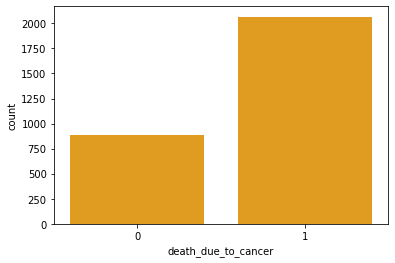

In [390]:
sns.countplot(x='death_due_to_cancer',data=train_data,color="orange")

In [391]:
y_train=train_data["death_due_to_cancer"]
X_train=train_data.drop("death_due_to_cancer",axis=1)
X_test=test_data

**RANDOM FOREST**

In [392]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [393]:
y_pred=rf.predict(X_test)

In [394]:
score=cross_val_score(rf, X_train, y_train, cv=5,scoring='f1')
score.mean()

0.7654964457990673

In [395]:
lg=LogisticRegression(solver='liblinear')
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [396]:
y_pred1=lg.predict(X_test)

In [397]:
score=cross_val_score(lg, X_train, y_train, cv=5,scoring='f1')
score.mean()

0.8208195142508397

**DECISION TREE**

In [398]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [399]:
y_pred2=dt.predict(X_test)

In [400]:
score=cross_val_score(dt, X_train, y_train, cv=5,scoring='f1')
score.mean()

0.7257741129812473

**ADA BOOST CLASSIFIER**

In [401]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
ada_model = AdaBoostClassifier(n_estimators = 100, random_state = 10)

ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=10)

In [402]:
y_pred3=ada_model.predict(X_test)

In [403]:
score=cross_val_score(ada_model, X_train, y_train, cv=5,scoring='f1')
score.mean()

0.8133558331089249

In [404]:

from sklearn.neighbors import KNeighborsClassifier

**STACKING CLASSIFIER**

In [405]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]

stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('rf_model',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=5,
                                                       min_samples_split=2,
                                    

In [406]:
score=cross_val_score(stack_model, X_train, y_train, cv=5,scoring='f1')
score.mean()

0.8018036941818725

**Hence so far logistic regression is performing better with a score of 82% and is the best model**

**PREDICTIONS**

In [407]:
prediction=pd.DataFrame(columns=['patient_id','death_due_to_cancer'])
prediction['patient_id']=patient_id
prediction['death_due_to_cancer']=y_pred1

In [408]:
prediction.to_csv('submission.csv',index=False)

In [410]:
df=pd.read_csv("submission.csv")
df.shape

(1969, 2)